<a href="https://colab.research.google.com/github/premsharma2206/Covid19prediction/blob/master/Covid19Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prediction of spread of Covid19 using machine learning


*Importing the required libraries...*

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

Exploring WorldWide data:


In [34]:
df=pd.read_csv('/content/covid_19_clean_complete (2).csv',parse_dates=['Date'])
df.rename(columns={'ObservationDate':'Date'}, inplace=True)
df_confirmed = pd.read_csv("/content/time_series_covid19_confirmed_global (2).csv")
df_recovered = pd.read_csv("/content/time_series_covid19_recovered_global (2).csv")
df_deaths = pd.read_csv("/content/time_series_covid19_deaths_global (2).csv")


In [35]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0


In [36]:
df_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19


In [37]:
df2 = df.groupby(["Date", "Country/Region", "Province/State"])[['Date', 'Province/State', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
df2.head()

,Date,Country/Region,Province/State,Confirmed,Deaths,Recovered
0,2020-01-22,Australia,Australian Capital Territory,0,0,0
1,2020-01-22,Australia,New South Wales,0,0,0
2,2020-01-22,Australia,Northern Territory,0,0,0
3,2020-01-22,Australia,Queensland,0,0,0
4,2020-01-22,Australia,South Australia,0,0,0


In [38]:
df.groupby('Date').sum().head()

,Lat,Long,Confirmed,Deaths,Recovered
Date,,,,,
2020-01-22,5615.595617,5920.673761,555,17,28
2020-01-23,5615.595617,5920.673761,654,18,30
2020-01-24,5615.595617,5920.673761,941,26,36
2020-01-25,5615.595617,5920.673761,1434,42,39
2020-01-26,5615.595617,5920.673761,2118,56,52


Visualizing Worldwide Covid19 data

In [39]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

In [40]:

f=go.Figure()
f.add_trace(go.Scatter(x=confirmed['Date'], y=confirmed['Confirmed'], mode='lines+markers', name='Confirmed',line=dict(color='blue', width=2)))
f.add_trace(go.Scatter(x=deaths['Date'], y=deaths['Deaths'], mode='lines+markers', name='Deaths', line=dict(color='Red', width=2)))
f.add_trace(go.Scatter(x=recovered['Date'], y=recovered['Recovered'], mode='lines+markers', name='Recovered', line=dict(color='Green', width=2)))
f.update_layout(title='WorldWide COVID19 Cases', xaxis_tickfont_size=14,yaxis=dict(title='No. of Cases'))
f.show()

**Forecasting future cases using Prophet**

In [41]:
from fbprophet import Prophet

In [42]:
confirmed.columns = ['ds','y']
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

confirmed.head()

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


In [43]:
confirmed.tail()

,ds,y
82,2020-04-13,1904835
83,2020-04-14,1976188
84,2020-04-15,2056051
85,2020-04-16,2152643
86,2020-04-17,2240187


In [44]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
89,2020-04-20
90,2020-04-21
91,2020-04-22
92,2020-04-23
93,2020-04-24


In [45]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
89,2020-04-20,2.464546e+06,2.449415e+06,2.481526e+06
90,2020-04-21,2.542247e+06,2.516592e+06,2.566245e+06
91,2020-04-22,2.623082e+06,2.586969e+06,2.658449e+06
92,2020-04-23,2.706165e+06,2.656493e+06,2.750392e+06
93,2020-04-24,2.789464e+06,2.730483e+06,2.846370e+06


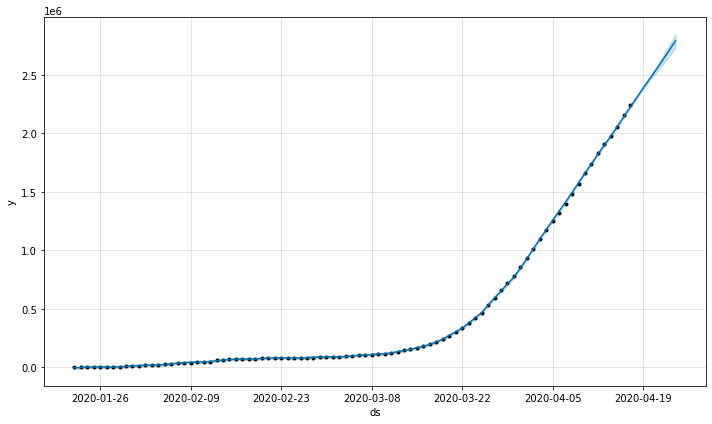

In [46]:
confirmed_forecast_plot = m.plot(forecast)

Forecasting the no. of deaths worldwide


In [47]:
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])

In [48]:
deaths.tail()

,ds,y
82,2020-04-13,119481
83,2020-04-14,125983
84,2020-04-15,134176
85,2020-04-16,143800
86,2020-04-17,153821


In [49]:
m = Prophet(interval_width=0.95)
m.fit(deaths)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
89,2020-04-20
90,2020-04-21
91,2020-04-22
92,2020-04-23
93,2020-04-24


In [50]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
89,2020-04-20,164963.385425,162569.240719,167518.013369
90,2020-04-21,171128.547856,168346.206157,174047.710848
91,2020-04-22,177498.194021,174292.932849,180900.140364
92,2020-04-23,184060.831293,180196.748111,187934.855792
93,2020-04-24,190684.665756,186080.521245,195708.191110


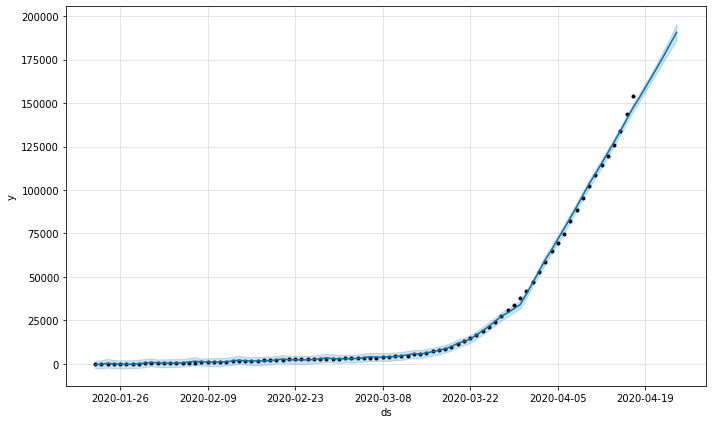

In [51]:
deaths_forecast_plot = m.plot(forecast)

In [ ]:
recovered.columns = ['ds','y']
recovered['ds'] = pd.to_datetime(recovered['ds'])

In [ ]:
m = Prophet(interval_width=0.95)
m.fit(recovered)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
89,2020-04-20
90,2020-04-21
91,2020-04-22
92,2020-04-23
93,2020-04-24


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
89,2020-04-20,594469.753590,581045.447790,608622.368325
90,2020-04-21,616027.331330,601493.219747,629662.964677
91,2020-04-22,639076.029889,622935.523229,653517.652555
92,2020-04-23,661280.112894,642653.888602,679760.986175
93,2020-04-24,682571.225806,663725.984970,701941.635576


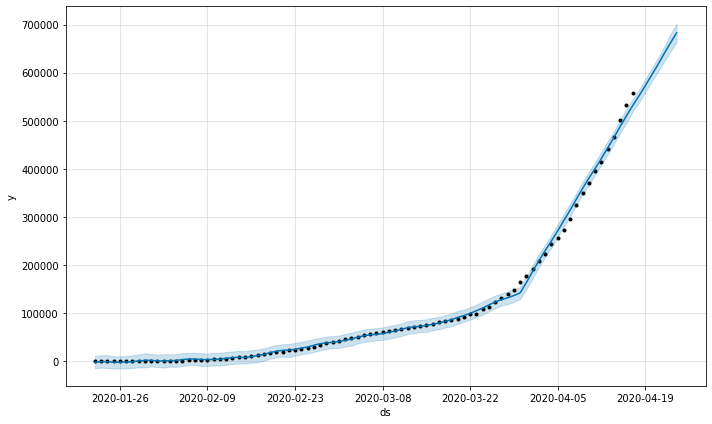

In [ ]:
recovered_forecast_plot = m.plot(forecast)

*Analysis and prediction of cases in* **India**

Reading the datasets...


In [ ]:

df4=pd.read_csv('/content/complete.csv')
df2=df4.iloc[120:,:].values
df3=pd.DataFrame(df2)
df4.head()

,Date,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured/Discharged/Migrated,Latitude,Longitude,Death,Total Confirmed cases
0,2020-01-30,Kerala,1,0,0,10.8505,76.2711,0,1
1,2020-01-31,Kerala,1,0,0,10.8505,76.2711,0,1
2,2020-02-01,Kerala,2,0,0,10.8505,76.2711,0,2
3,2020-02-02,Kerala,3,0,0,10.8505,76.2711,0,3
4,2020-02-03,Kerala,3,0,0,10.8505,76.2711,0,3


In [ ]:

df3.rename(columns={0:'Date',1:'Name of State / UT',2:'Total Confirmed cases (Indian National)',3:'Total Confirmed cases ( Foreign National )',4:'Cured/Discharged/Migrated',5:'Latitude',6:'Longitude',7:'Death',8:'Total Confirmed cases'},inplace=True)
df3.head()

,Date,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured/Discharged/Migrated,Latitude,Longitude,Death,Total Confirmed cases
0,2020-03-12,Union Territory of Ladakh,3,0,0,34.2996,78.2932,0,3
1,2020-03-12,Uttar Pradesh,10,1,0,26.8467,80.9462,0,11
2,2020-03-13,Andhra Pradesh,1,0,0,15.9129,79.74,0,1
3,2020-03-13,Delhi,6,0,0,28.7041,77.1025,0,6
4,2020-03-13,Haryana,0,14,0,29.0588,76.0856,0,14


In [ ]:
df5 = df3.groupby(["Date"])[['Cured/Discharged/Migrated', 'Death', 'Total Confirmed cases']].sum().reset_index()
df5.tail()



,Date,Cured/Discharged/Migrated,Death,Total Confirmed cases
30,2020-04-11,643,239,7447
31,2020-04-12,716,273,8356
32,2020-04-13,857,308,9152
33,2020-04-15,1306,377,11439
34,2020-04-16,1489,414,12380


In [ ]:
confirmedindia = df5.groupby('Date').sum()['Total Confirmed cases'].reset_index()
deathsindia = df5.groupby('Date').sum()['Death'].reset_index()
recoveredindia = df5.groupby('Date').sum()['Cured/Discharged/Migrated'].reset_index()

In [ ]:
f=go.Figure()
f.add_trace(go.Scatter(x=confirmedindia['Date'], y=confirmedindia['Total Confirmed cases'], mode='lines+markers', name='Confirmed',line=dict(color='blue', width=2)))
f.add_trace(go.Scatter(x=deathsindia['Date'], y=deathsindia['Death'], mode='lines+markers', name='Deaths', line=dict(color='Red', width=2)))
f.add_trace(go.Scatter(x=recoveredindia['Date'], y=recoveredindia['Cured/Discharged/Migrated'], mode='lines+markers', name='Recovered', line=dict(color='Green', width=2)))
f.update_layout(title='COVID19 Cases in India', xaxis_tickfont_size=14,yaxis=dict(title='No. of Cases'))
f.show()

**Forecasting cases in India using Prophet**


In [ ]:
from fbprophet import Prophet

In [ ]:
confirmedindia.columns = ['ds','y']
confirmedindia['ds'] = pd.to_datetime(confirmedindia['ds'])

In [ ]:
confirmedindia.tail()

,ds,y
30,2020-04-11,7447
31,2020-04-12,8356
32,2020-04-13,9152
33,2020-04-15,11439
34,2020-04-16,12380


In [ ]:
m = Prophet(interval_width=0.95)
m.fit(confirmedindia)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
37,2020-04-19
38,2020-04-20
39,2020-04-21
40,2020-04-22
41,2020-04-23


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
37,2020-04-19,8728.278879,5515.522771,11806.148422
38,2020-04-20,9060.181313,5969.647730,11897.295447
39,2020-04-21,8718.032043,5668.990669,11769.572013
40,2020-04-22,9931.418209,6807.943617,13289.680200
41,2020-04-23,10595.104100,7685.352251,13835.443635


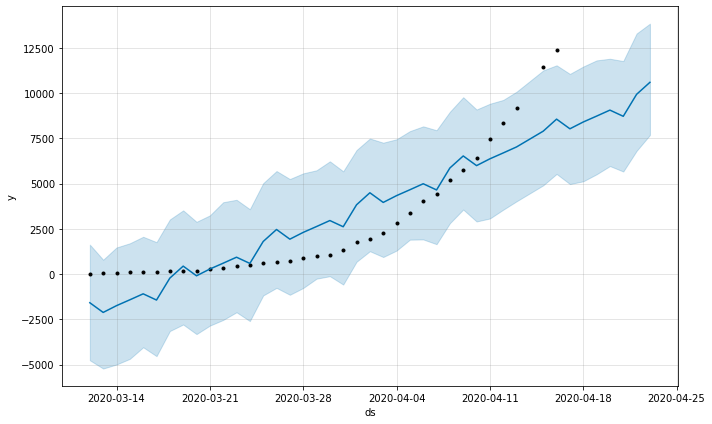

In [ ]:
confirmed_forecast_plot = m.plot(forecast)

In [ ]:
deathsindia.columns = ['ds','y']
deathsindia['ds'] = pd.to_datetime(deathsindia['ds'])

In [ ]:
deathsindia.tail()

,ds,y
30,2020-04-11,239
31,2020-04-12,273
32,2020-04-13,308
33,2020-04-15,377
34,2020-04-16,414


In [ ]:
m = Prophet(interval_width=0.98)
m.fit(deathsindia)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
37,2020-04-19
38,2020-04-20
39,2020-04-21
40,2020-04-22
41,2020-04-23


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
37,2020-04-19,270.033667,133.709374,416.619638
38,2020-04-20,284.439739,155.603619,427.252663
39,2020-04-21,265.938002,126.361069,400.348862
40,2020-04-22,308.653175,164.161487,430.238526
41,2020-04-23,333.269447,195.904337,473.548666


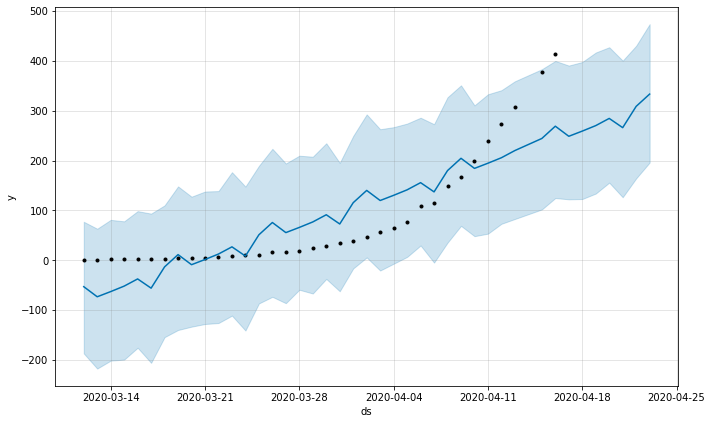

In [ ]:
deaths_forecast_plot=m.plot(forecast)

In [ ]:
A=[9,9,9,9,9]
n=len(A)
if(A[n-1]!=9):
  A[n-1]+=1
  print(A)
else:
  for i in range(n-1,-1,-1):
    if(A[i]==9):
      A[i]=0
    elif(i!=0):
      A[i]+=1
      print(A)
  if(A[0]==0):
    b=[1]
  else:
    b=[]
    b.append(A[0]+1)
    n-=1
  for i in range(n):
    b.append(0)
  print(b)
    


[1, 0, 0, 0, 0, 0]
